In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df1 = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv")
df1


,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,ITF,ITF1,13,Abruzzo
1,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,ITF,ITF1,13,Abruzzo
2,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,60-69,12,4,16,0,0,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161510,2021-12-13,Pfizer/BioNTech,VEN,70-79,1631,1870,56,41,1,3403,ITH,ITH3,5,Veneto
161511,2021-12-13,Pfizer/BioNTech,VEN,80-89,605,990,16,14,0,1565,ITH,ITH3,5,Veneto
161512,2021-12-13,Pfizer/BioNTech,VEN,90+,123,340,3,7,0,453,ITH,ITH3,5,Veneto
161513,2021-12-13,Vaxzevria (AstraZeneca),CAL,50-59,1,0,0,1,0,0,ITF,ITF6,18,Calabria


In [ ]:
df2 = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv")

totalepopolazione = df2.groupby("area", as_index = False)["totale_popolazione"].sum()
totalepopolazione

,area,totale_popolazione
0,ABR,1188922
1,BAS,494881
2,CAL,1689716
3,CAM,5104347
4,EMR,3998406
5,FVG,1088152
6,LAZ,5147533
7,LIG,1399466
8,LOM,9246804
9,MAR,1366477


il primo grafico deve visualizzare, per ogni regione, il numero di vaccinati (prima dose) e il numero totale di abitanti di quella regione

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


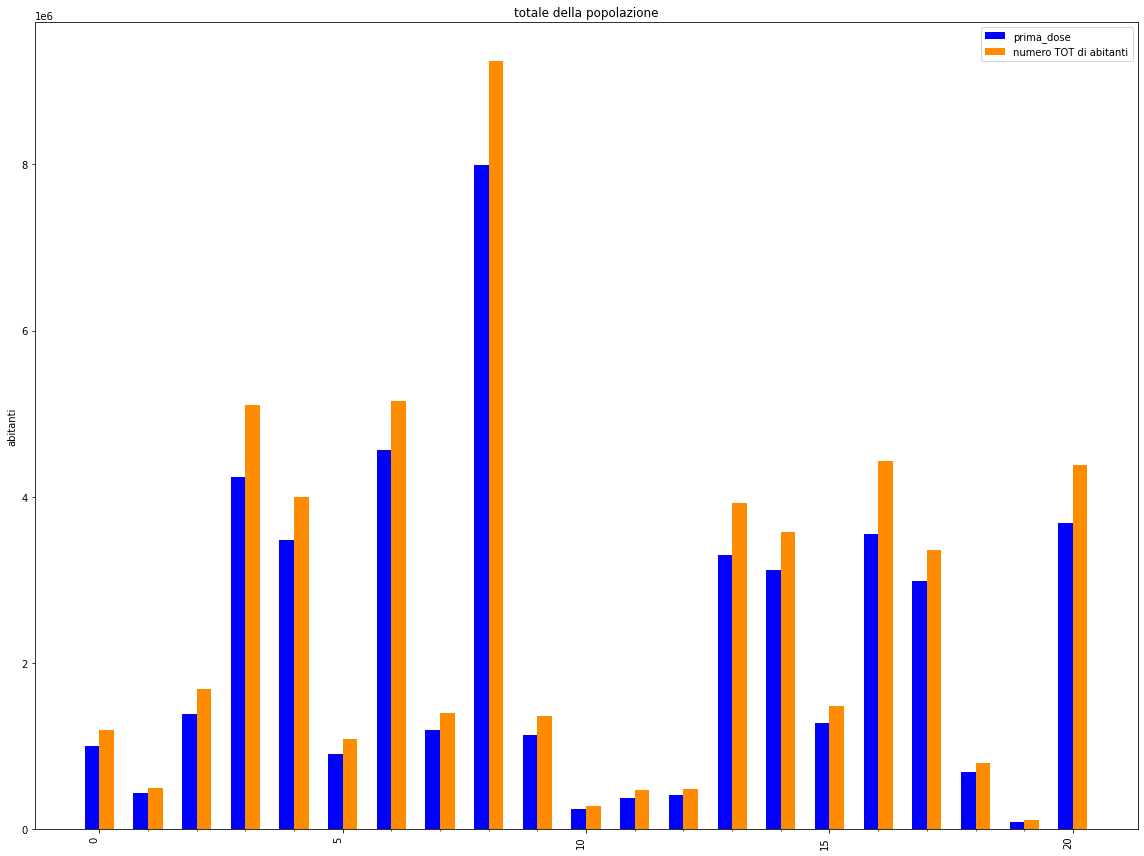

In [ ]:


df1groupby = df1.groupby("area",as_index = False)["prima_dose"].sum()


import matplotlib.pyplot as plt
import numpy as np

labels = list(df1groupby["area"])
fig = plt.figure(figsize=(16,12)) 
ax = plt.axes()
xpos = np.arange(len(labels))
width = 0.3  
ax.bar(xpos - width/2 ,df1groupby["prima_dose"],label="prima_dose",width = width,color="blue")
ax.bar(xpos + width/2 ,totalepopolazione["totale_popolazione"],label="numero TOT di abitanti",width = width,color="#ff8c00")
fig.autofmt_xdate(rotation=90)
ax.set_ylabel('abitanti')
ax.set_title('totale della popolazione')
ax.set_xticks(xpos, labels)
ax.legend()
ax.legend(loc=0)
fig.tight_layout()
plt.show()

il secondo deve contenere le percentuali di vaccinazioni (prima dose) sul totale dei vaccinati. 

In [ ]:

df2groupby = df1.groupby("area",as_index = False)["prima_dose"].sum()
df2groupby["% vaccinati(prima dose)"] = round((df2groupby["prima_dose"] *100) / totalepopolazione["totale_popolazione"], 2)
df2groupby

,area,prima_dose,% vaccinati(prima dose)
0,ABR,994677,83.66
1,BAS,429632,86.82
2,CAL,1387447,82.11
3,CAM,4241485,83.10
4,EMR,3482451,87.10
5,FVG,907440,83.39
6,LAZ,4559140,88.57
7,LIG,1190806,85.09
8,LOM,7991469,86.42
9,MAR,1137269,83.23


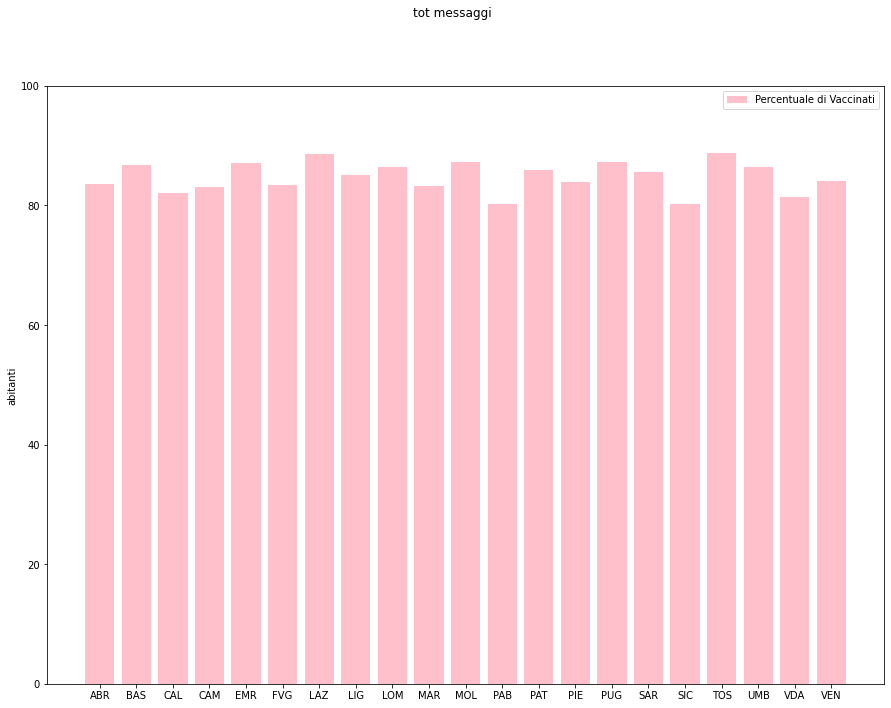

In [ ]:
df3groupby = df2groupby["% vaccinati(prima dose)"]
df3groupby

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,11))


ax = plt.axes()
ax.bar(df2groupby["area"], df3groupby.values, label = "Percentuale di Vaccinati", color="pink")
ax.set_ylabel("abitanti")
ax.set_ylim([0, 100])
fig.suptitle("tot messaggi")

ax.legend(loc=0)

plt.show()

Risultato finale

TypeError: ignored

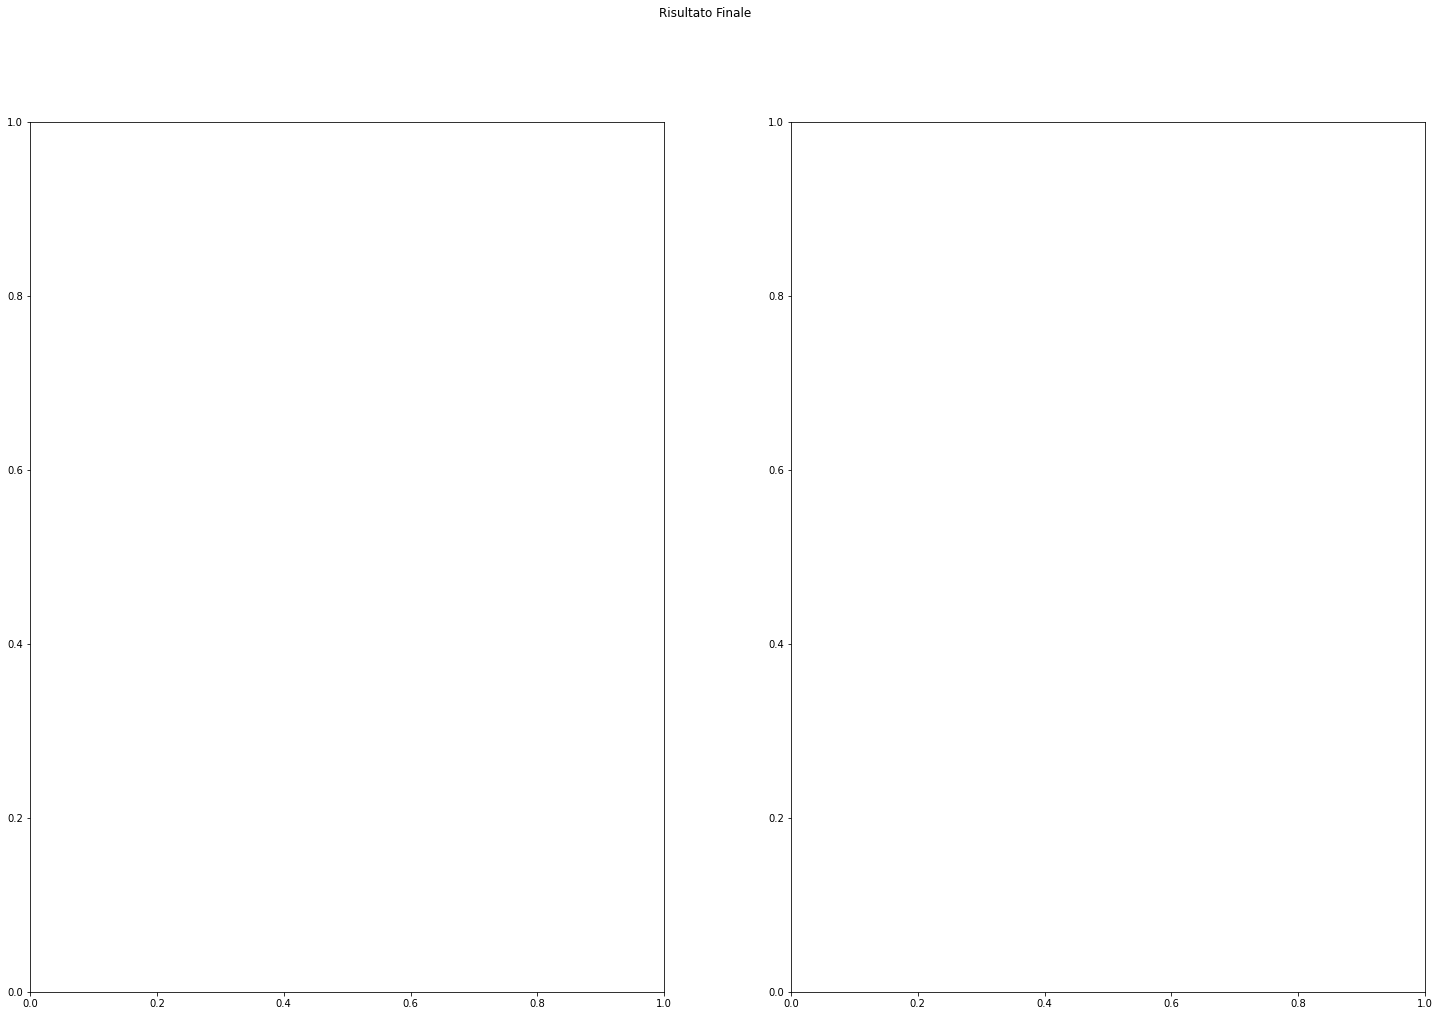

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(25,16)

fig.suptitle('Risultato Finale')


ax1.bar(xpos - width/2 ,df1groupby["prima_dose"],label="prima_dose",width = width,color="blue")
ax1.bar(xpos + width/2 ,totalepopolazione["totale_popolazione"],label="numero TOT di abitanti",width = width,color="#ff8c00")

ax2.bar(df2groupby["area"], df3groupby.values, label = "Percentuale di Vaccinati", color="pink")

plt.savefig('GRAFICI.png')